# 📘 Clase: Introducción a Grafos


### 🎯 Objetivo:
Comprender qué es un grafo como estructura de datos, sus componentes, tipos, representaciones, visualización con NetworkX y aplicaciones principales en informática.



## 🔷 ¿Qué es un grafo?
Un **grafo** es una estructura que modela relaciones entre elementos. Está compuesto por:

- Un conjunto de **nodos o vértices**
- Un conjunto de **aristas** que conectan pares de vértices

Puede ser **dirigido** o **no dirigido**, **ponderado** o **no ponderado**.



## 🧱 Terminología Básica

| Término         | Definición                                                                 |
|-----------------|------------------------------------------------------------------------------|
| Vértice (nodo)  | Elemento o punto del grafo                                                  |
| Arista          | Conexión entre dos vértices                                                 |
| Arista dirigida | Conexión con dirección (va de un nodo a otro)                              |
| Grado           | Número de aristas conectadas a un nodo                                      |
| Camino          | Secuencia de vértices conectados                                            |
| Ciclo           | Camino cerrado (comienza y termina en el mismo nodo)                        |
| Conexo          | Existe camino entre todos los pares de vértices                             |
| Ponderado       | Las aristas tienen un valor o peso numérico                                 |


Grado de cada nodo:
A: entrada = 1, salida = 1
B: entrada = 1, salida = 1
C: entrada = 1, salida = 1
D: entrada = 1, salida = 1
E: entrada = 1, salida = 1

Camino A → D: A → B → C → D

¿Existen ciclos?: Sí
Ciclos encontrados: [['C', 'D', 'E', 'A', 'B']]

¿Es conexo?: Sí


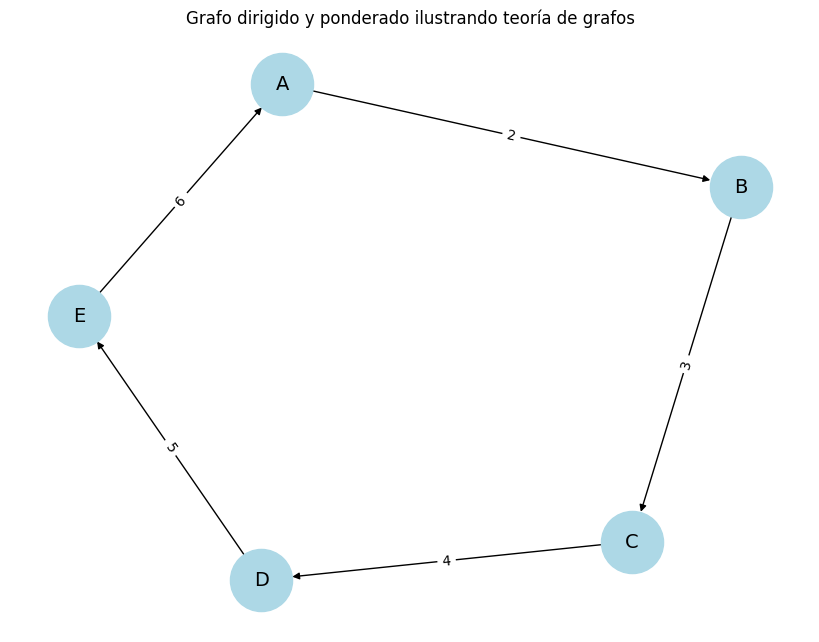

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido y ponderado
G = nx.DiGraph()

# ====================================
# 📌 VÉRTICE (NODO)
# Cada letra representa un vértice
# ====================================
vertices = ['A', 'B', 'C', 'D', 'E']
G.add_nodes_from(vertices)

# ====================================
# 📌 ARISTA y ARISTA DIRIGIDA
# Las conexiones tienen dirección y peso
# ====================================
G.add_weighted_edges_from([
    ('A', 'B', 2),  # A → B con peso 2
    ('B', 'C', 3),  # B → C con peso 3
    ('C', 'D', 4),  # C → D con peso 4
    ('D', 'E', 5),  # D → E con peso 5
    ('E', 'A', 6)   # E → A con peso 6 → se cierra un ciclo
])

# ====================================
# 📌 GRADO de cada nodo
# in_degree: entradas | out_degree: salidas
# ====================================
print("Grado de cada nodo:")
for nodo in G.nodes:
    print(f"{nodo}: entrada = {G.in_degree(nodo)}, salida = {G.out_degree(nodo)}")

# ====================================
# 📌 CAMINO: A → B → C → D
# Representación secuencial de vértices conectados
# ====================================
camino = ['A', 'B', 'C', 'D']
print("\nCamino A → D:", " → ".join(camino))

# ====================================
# 📌 CICLO
# Un ciclo es un camino cerrado (E → A → B → C → D → E)
# ====================================
ciclos = list(nx.simple_cycles(G))
print("\n¿Existen ciclos?:", "Sí" if ciclos else "No")
print("Ciclos encontrados:", ciclos)

# ====================================
# 📌 CONEXO
# Convertimos el grafo a no dirigido para verificar si es conexo
# ====================================
undirected = G.to_undirected()
print("\n¿Es conexo?:", "Sí" if nx.is_connected(undirected) else "No")

# ====================================
# 📌 VISUALIZACIÓN DEL GRAFO
# Incluye pesos como etiquetas
# ====================================
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=14, arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Grafo dirigido y ponderado ilustrando teoría de grafos")
plt.axis('off')
plt.show()


--------

## Tipos de Grafos con Ejemplos

Un grafo es una estructura que modela relaciones entre objetos. A continuación se presentan los tipos más comunes con su definición, aplicación y ejemplo en Python:

### 1. Grafo No Dirigido
Un grafo donde las aristas no tienen dirección, es decir, si A está conectado a B, también B está conectado a A.  

Aplicación: Redes de amistad donde la relación es mutua.

```python
# Grafo No Dirigido
grafo_no_dirigido = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A'],
    'D': ['B']
}
```

### 2. Grafo Dirigido
Las aristas tienen una dirección específica. A → B no implica que B → A.  

Aplicación: Redes sociales como Twitter, donde uno sigue a otro.

```python
# Grafo Dirigido
grafo_dirigido = {
    'A': ['B'],
    'B': ['C'],
    'C': ['A']
}
```

### 3. Grafo Ponderado
Es un grafo en el que las aristas tienen un valor numérico o peso, que representa distancia, costo, tiempo, etc.  

Aplicación: Mapas de rutas, redes de transporte, algoritmos de caminos mínimos.

```python
# Grafo Ponderado
grafo_ponderado = {
    'A': [('B', 5), ('C', 2)],
    'B': [('D', 1)],
    'C': [('D', 7)],
    'D': []
}
```

### 4. Grafo Completo
Todos los nodos están conectados entre sí. Si hay n nodos, existen n(n-1)/2 conexiones (no dirigido).  

Aplicación: Simulaciones de redes densas, redes sociales totalmente conectadas.

```python
# Grafo Completo
grafo_completo = {
    'A': ['B', 'C'],
    'B': ['A', 'C'],
    'C': ['A', 'B']
}
```

### 5. Árbol
Es un grafo conexo y sin ciclos, con una estructura jerárquica. Existe un único camino entre dos nodos.  

Aplicación: Árboles genealógicos, jerarquías de archivos, algoritmos de búsqueda.

```python
# Árbol
arbol = {
    'Root': ['A', 'B'],
    'A': ['C', 'D'],
    'B': [],
    'C': [],
    'D': []
}
```


-----------

## ¿Qué es un grafo ponderado?

Un **grafo ponderado** es un tipo de grafo en el que cada **arista tiene un peso o valor numérico** que representa una magnitud como distancia, tiempo, costo, etc.

Este tipo de grafos es muy útil en problemas donde no todas las conexiones tienen el mismo valor, por ejemplo:

- Mapas de rutas (el peso representa la distancia entre ciudades).
- Redes de transporte (el peso representa el tiempo estimado entre estaciones).
- Algoritmos de caminos más cortos como Dijkstra o A*.

### ¿Cómo se representa un grafo ponderado en Python?

Se usa un **diccionario**, donde cada nodo apunta a una lista de tuplas. Cada tupla contiene un nodo destino y su peso.

```python
# Grafo ponderado simple
grafo = {
    'A': [('B', 5), ('C', 2)],
    'B': [('D', 1)],
    'C': [('D', 7)],
    'D': []
}
```

En este ejemplo:
- De `A` a `B` hay una conexión con peso 5.
- De `A` a `C` hay una conexión con peso 2.
- De `B` a `D` el peso es 1.
- De `C` a `D` el peso es 7.

---

### ¿Cómo obtener el peso entre dos nodos?

Para consultar el peso de una arista específica entre dos nodos, puedes hacer lo siguiente:

```python
# Obtener el peso de A a B
for destino, peso in grafo['A']:
    if destino == 'B':
        print(f"Peso de A a B: {peso}")
```


Resultado: `Peso de A a B: 5`


También puedes definir una función reutilizable:

```python
def obtener_peso(grafo, origen, destino):
    for nodo_destino, peso in grafo.get(origen, []):
        if nodo_destino == destino:
            return peso
    return None

# Uso
print(obtener_peso(grafo, 'A', 'C'))  # Imprime: 2
print(obtener_peso(grafo, 'A', 'D'))  # Imprime: None (no hay conexión directa)
```

---

### Aplicación práctica

Supón que estás resolviendo un problema de rutas de entrega en una ciudad. Podrías usar un grafo ponderado donde cada nodo representa un punto de entrega y cada arista tiene el tiempo estimado en minutos:

```python
rutas = {
    'Centro': [('Norte', 10), ('Sur', 20)],
    'Norte': [('Este', 15)],
    'Sur': [('Este', 5)],
    'Este': []
}
```

Esto te permitiría aplicar algoritmos de optimización para calcular la ruta más rápida o más corta.



______

----------

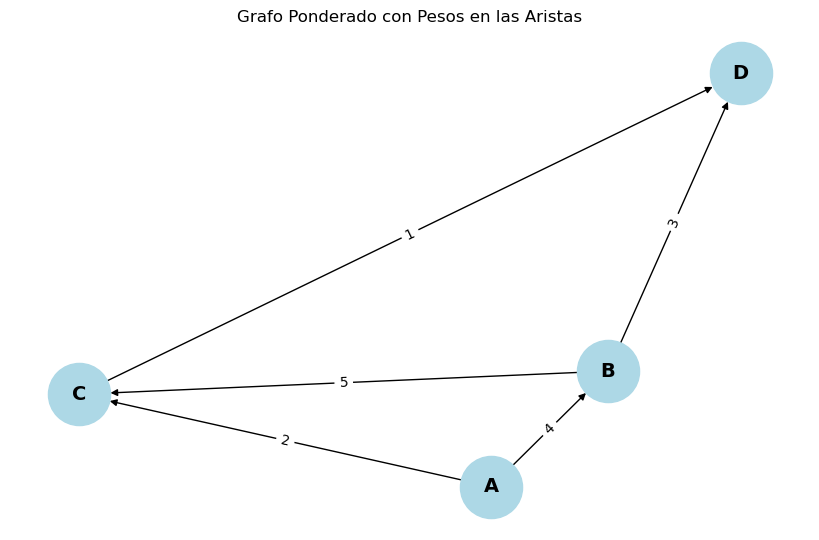

Peso de A → B: 4

Listado de pesos de todas las aristas:
A → B: peso = 4
A → C: peso = 2
B → C: peso = 5
B → D: peso = 3
C → D: peso = 1


In [5]:
# 📦 Importamos librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt

# 🧠 Creamos un grafo dirigido y ponderado
G = nx.DiGraph()

# 🧱 Añadimos nodos manualmente (opcional, también se crean automáticamente al agregar aristas)
G.add_nodes_from(['A', 'B', 'C', 'D'])

# ➕ Añadimos aristas con pesos usando el parámetro 'weight'
G.add_edge('A', 'B', weight=4)
G.add_edge('A', 'C', weight=2)
G.add_edge('B', 'C', weight=5)
G.add_edge('C', 'D', weight=1)
G.add_edge('B', 'D', weight=3)

# 🎯 Posiciones para graficar el grafo (usa spring_layout para distribución estética)
pos = nx.spring_layout(G, seed=42)

# 🎨 Dibujamos nodos y aristas
plt.figure(figsize=(8, 5))
nx.draw(
    G, pos, with_labels=True,
    node_color='lightblue', node_size=2000,
    font_size=14, font_weight='bold', arrows=True
)

# 🏷️ Extraemos los pesos de las aristas para dibujarlos como etiquetas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# 🧾 Título
plt.title("Grafo Ponderado con Pesos en las Aristas")
plt.axis('off')
plt.show()

# 🔍 Acceder a un peso específico
peso_ab = G['A']['B']['weight']
print(f"Peso de A → B: {peso_ab}")

# 🔁 Iterar sobre todas las aristas y mostrar sus pesos
print("\nListado de pesos de todas las aristas:")
for u, v, datos in G.edges(data=True):
    print(f"{u} → {v}: peso = {datos['weight']}")


--------------

---------------


## ¿Cuándo introducir pesos en las aristas?

Después de presentar los tipos de grafos, se introducen los **grafos ponderados** para representar escenarios reales como:

- Costos de transporte entre ciudades
- Tiempo estimado entre procesos
- Distancia en mapas

Cada arista tendrá un valor numérico (peso), y se construyen usando tuplas o `add_weighted_edges_from()` en NetworkX.



## Representaciones Comunes

### 🔹 Matriz de Adyacencia
- Útil para grafos densos.
- Representa con una matriz booleana o de pesos.

### 🔹 Lista de Adyacencia
- Eficiente para grafos dispersos.
- Usa diccionarios o listas.

Ejemplo:
"Supongamos que cada nodo es una ciudad y el peso representa la distancia en kilómetros."
```python
grafo = {
    'A': [('B', 5), ('C', 2)],
    'B': [('D', 1)],
    'C': [('D', 7)]
}
```



## NetworkX para visualización

Una vez introducidos los conceptos teóricos, se enseña `networkx` como herramienta de apoyo para visualizar estructuras complejas:

```bash
pip install networkx matplotlib
```

### Ejemplo:
```python
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_weighted_edges_from([('A', 'B', 5), ('B', 'C', 3)])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.show()
```


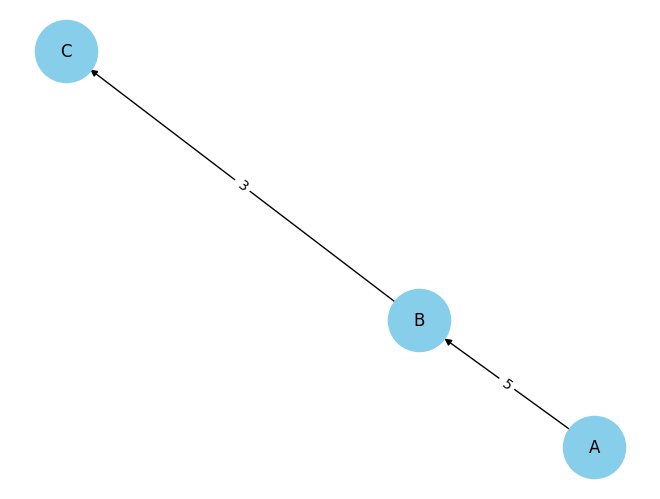

In [2]:
# pip install networkx matplotlib
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_weighted_edges_from([('A', 'B', 5), ('B', 'C', 3)])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.show()

## 💡 Aplicaciones de Grafos

Los grafos son una de las estructuras de datos más versátiles y potentes en informática. A continuación, se presentan algunas de sus principales aplicaciones junto con una explicación específica de su utilidad en cada contexto:

---

### 🔗 Redes sociales (usuarios y sus relaciones)
En las redes sociales como Facebook, Twitter o Instagram, los usuarios pueden representarse como **nodos** y las relaciones (amistad, seguir, reaccionar, etc.) como **aristas**. Estas pueden ser dirigidas o no dirigidas, dependiendo del tipo de interacción:

- **No dirigidas**: amistad mutua (Facebook).
- **Dirigidas**: "seguir" a alguien (Twitter, Instagram).

> 📊 Ejemplo: determinar el grado de influencia de un usuario, detectar comunidades, o recomendar amistades comunes.

---

### 🗺️ Sistemas de navegación (mapas, GPS)
Las ciudades o puntos geográficos se modelan como **nodos**, y los caminos o carreteras como **aristas ponderadas** (con peso que representa la distancia, tiempo o costo).

> 🚗 Se utilizan en GPS y servicios como Google Maps para calcular rutas óptimas, evitar tráfico, o encontrar el camino más corto mediante algoritmos como **Dijkstra** o **A\***.

---

### 🧩 Planificación de tareas (dependencias entre procesos)
En sistemas de planificación y ejecución de procesos (como en proyectos o compiladores), las tareas se modelan como **nodos** y las dependencias como **aristas dirigidas**.

> ⏱️ Esto permite representar que una tarea solo puede ejecutarse cuando otra ha finalizado (ejemplo: en una compilación de código, una librería debe compilar antes de su uso).

---

### 🧠 Análisis de datos relacionales
Los grafos permiten analizar relaciones entre entidades en bases de datos (como clientes, productos, transacciones) utilizando grafos para representar relaciones complejas.

> 🔍 Usado en detección de fraudes, análisis de redes de contacto, o trazabilidad en sistemas de producción o salud.

---

### 🤖 Algoritmos de optimización y búsqueda (Dijkstra, A*)
Muchos problemas clásicos de la informática (como encontrar el camino más corto, flujo máximo, árboles de expansión mínima, etc.) se modelan naturalmente con grafos.

> 📈 Aplicados en IA para planificación de rutas, búsqueda de soluciones óptimas, simulaciones, entre otros.

---



## 📝 Actividad en Clase
1. Representa un grafo dirigido con al menos 5 nodos y 7 aristas.
2. Usa `networkx` para visualizarlo.
3. Agrega pesos a las aristas y representa un grafo ponderado.
4. Comenta en qué contexto se usaría tu modelo.


--------------

# Ejemplo 1: Ingreso dinámico de pesos por el usuario (simulado)

In [3]:
import networkx as nx

# Crear un grafo dirigido
G = nx.DiGraph()

# Nodos predefinidos
nodos = ['A', 'B', 'C', 'D']
G.add_nodes_from(nodos)

# Pares de conexiones posibles
aristas = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D')]

# Ingreso simulado de pesos (como si fueran datos del usuario o una API)
pesos_ingresados = {
    ('A', 'B'): 10,
    ('A', 'C'): 15,
    ('B', 'D'): 5,
    ('C', 'D'): 8
}

# Añadir aristas con pesos al grafo
for (u, v) in aristas:
    peso = pesos_ingresados.get((u, v), 1)  # valor por defecto 1
    G.add_edge(u, v, weight=peso)

# Mostrar todos los pesos asignados
for u, v, datos in G.edges(data=True):
    print(f"{u} → {v} | peso = {datos['weight']}")


A → B | peso = 10
A → C | peso = 15
B → D | peso = 5
C → D | peso = 8


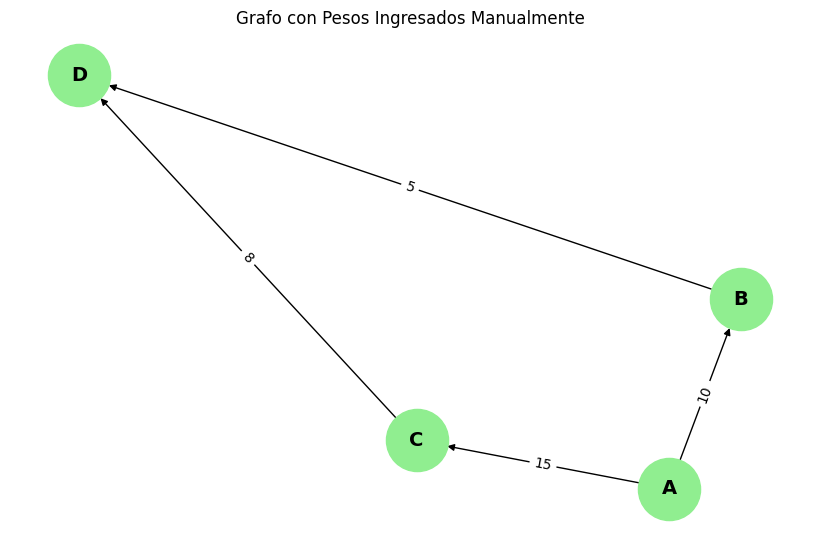

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Posición automática para el layout del grafo
pos = nx.spring_layout(G, seed=42)

# Dibujar nodos y aristas
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=14, font_weight='bold', arrows=True)

# Dibujar los pesos sobre las aristas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Grafo con Pesos Ingresados Manualmente")
plt.axis('off')
plt.show()


----------

## Distancia euclidiana
La **distancia euclidiana** es la forma más común de medir la distancia entre dos puntos en el espacio. Es la misma que usamos en geometría cuando medimos con una regla la distancia entre dos ubicaciones en un plano.


### Definición Matemática: Distancia Euclidiana

La **distancia euclidiana** entre dos puntos A(x₁, y₁) y B(x₂, y₂) se calcula con la fórmula:

    distancia = √((x₂ - x₁)² + (y₂ - y₁)²)

Donde:
- x₁, y₁ son las coordenadas del punto A
- x₂, y₂ son las coordenadas del punto B

Esta fórmula representa la **longitud del segmento recto** que conecta dos puntos en el plano cartesiano.


In [5]:
import math

# Coordenadas de dos puntos
A = (2, 3)
B = (6, 7)

# Distancia euclidiana
distancia = math.hypot(B[0] - A[0], B[1] - A[1])
print(f"Distancia Euclidiana entre A y B: {distancia:.2f}")


Distancia Euclidiana entre A y B: 5.66


# Ejemplo 2: Cálculo automático del peso usando distancia Euclidiana

Supón que cada nodo tiene coordenadas reales (por ejemplo, latitud/longitud o coordenadas en un mapa):


In [6]:
import networkx as nx
import math

# Coordenadas (x, y) de cada nodo
coordenadas = {
    'A': (0, 0),
    'B': (3, 4),
    'C': (6, 1),
    'D': (8, 5)
}

# Crear grafo
G = nx.DiGraph()
G.add_nodes_from(coordenadas.keys())

# Crear aristas con pesos automáticos (distancia euclidiana)
for origen in coordenadas:
    for destino in coordenadas:
        if origen != destino:
            x1, y1 = coordenadas[origen]
            x2, y2 = coordenadas[destino]
            distancia = math.hypot(x2 - x1, y2 - y1)  # Distancia euclidiana
            G.add_edge(origen, destino, weight=round(distancia, 2))

# Mostrar aristas y sus pesos
for u, v, datos in G.edges(data=True):
    print(f"{u} → {v} | distancia = {datos['weight']}")


A → B | distancia = 5.0
A → C | distancia = 6.08
A → D | distancia = 9.43
B → A | distancia = 5.0
B → C | distancia = 4.24
B → D | distancia = 5.1
C → A | distancia = 6.08
C → B | distancia = 4.24
C → D | distancia = 4.47
D → A | distancia = 9.43
D → B | distancia = 5.1
D → C | distancia = 4.47


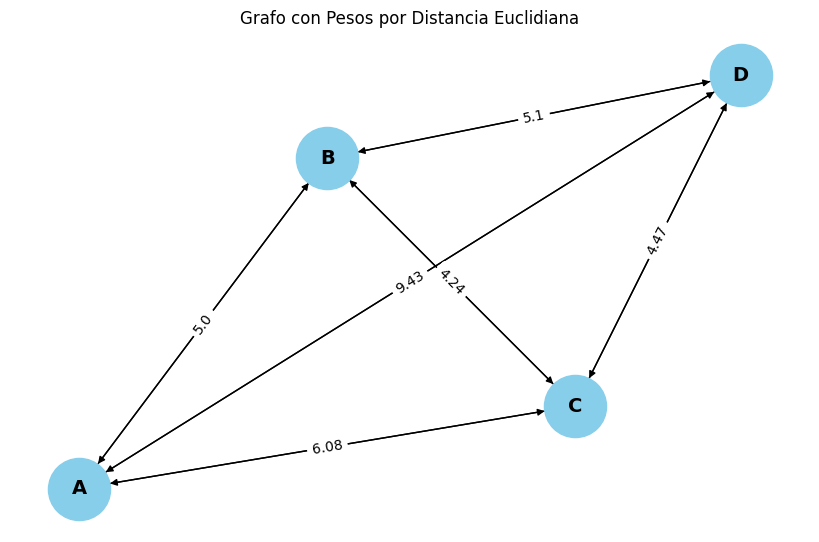

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Usamos directamente las coordenadas como posiciones del grafo
pos = coordenadas  # mismas coordenadas (x, y) que definen el peso

# Dibujar nodos y aristas
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=14, font_weight='bold', arrows=True)

# Dibujar etiquetas con distancias
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Grafo con Pesos por Distancia Euclidiana")
plt.axis('off')
plt.show()


-------------

## Algoritmos de Caminos Más Cortos: Teoría y Aplicación

### ¿Qué es un camino mínimo?

Un **camino mínimo** es la ruta más corta entre dos nodos de un grafo. La definición de "más corta" puede referirse a:

- **Menor número de pasos** (en grafos no ponderados)
- **Menor costo acumulado** (en grafos ponderados)

---

### Algoritmo de Dijkstra

El **algoritmo de Dijkstra** permite encontrar el camino más corto desde un nodo origen hasta cualquier otro nodo en un **grafo dirigido o no dirigido con pesos positivos**.

Este algoritmo tiene en cuenta los **pesos de las aristas** y es ampliamente utilizado en problemas reales como:

- Sistemas de navegación (GPS)
- Planificación de rutas logísticas
- Optimización de redes de comunicación

---

### ¿Cómo usarlo en `networkx`?

```python
import networkx as nx

# Crear el grafo ponderado dirigido
G = nx.DiGraph()
G.add_edge("A", "B", weight=4)
G.add_edge("A", "C", weight=2)
G.add_edge("B", "D", weight=5)
G.add_edge("C", "D", weight=1)

# Encontrar el camino más barato de A a D
camino = nx.dijkstra_path(G, source="A", target="D")
costo_total = nx.dijkstra_path_length(G, source="A", target="D")

print("Camino más corto:", camino)
print("Costo total:", costo_total)
```

---

### Diferencia entre `shortest_path` y `dijkstra_path`

| Función           | Usa pesos | Tipo de grafo      | Cuándo usarla                         |
|------------------|-----------|--------------------|----------------------------------------|
| `shortest_path`  | ❌ No      | No ponderados      | Cuando solo interesa la menor cantidad de pasos |
| `dijkstra_path`  | ✅ Sí      | Ponderados (pesos positivos) | Cuando se busca el camino de menor **costo** |

---

### Aplicación real

Supongamos que cada nodo representa una ciudad, y cada arista representa una carretera con un **costo de transporte** (por distancia, peaje o tiempo). Dijkstra nos permite hallar la **ruta más económica o eficiente** entre dos ciudades, considerando estos valores.

Ejemplo de uso:
- Determinar el camino más barato de Quito a Cuenca
- Encontrar la mejor secuencia de entregas para una empresa de logística


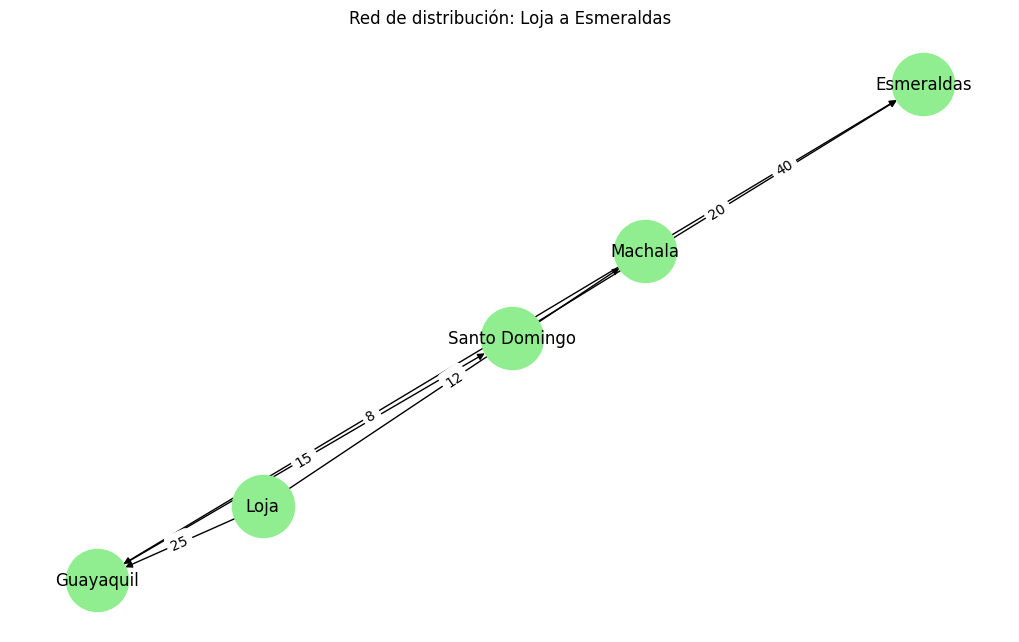

Camino más barato de Loja a Esmeraldas: ['Loja', 'Machala', 'Esmeraldas']
Costo total del viaje: 52


In [8]:
# Importamos las librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt

# Creamos el grafo dirigido
G = nx.DiGraph()

# Añadimos las aristas junto con sus respectivos pesos
G.add_edge('Loja', 'Machala', weight=12)
G.add_edge('Machala', 'Guayaquil', weight=8)
G.add_edge('Loja', 'Guayaquil', weight=25)
G.add_edge('Guayaquil', 'Santo Domingo', weight=15)
G.add_edge('Santo Domingo', 'Esmeraldas', weight=20)
G.add_edge('Machala', 'Esmeraldas', weight=40)

# Definimos la posición de los nodos usando un layout automático
pos = nx.spring_layout(G, seed=42)

# Dibujamos el grafo
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=12, arrows=True)

# Mostramos los pesos sobre las aristas
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Título del gráfico
plt.title("Red de distribución: Loja a Esmeraldas")
plt.axis('off')
plt.show()

# 🧠 Encontramos el camino más barato y su costo total usando Dijkstra
camino = nx.dijkstra_path(G, source='Loja', target='Esmeraldas')
costo = nx.dijkstra_path_length(G, source='Loja', target='Esmeraldas')

# Mostramos resultados
print("Camino más barato de Loja a Esmeraldas:", camino)
print("Costo total del viaje:", costo)
